# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

AIM: To explain how machine learning can help in a bank marketing campaign. The goal of our classifier is to predict, using a logistic regression, if a client may subscribe to a fixed term deposit. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (‘yes’) or not (‘no’) subscribed.

The dataset contains both numerical and categorical input variables, while the response variable ('target') takes value 1 in case of 'yes' and 0 in case of 'no'.

You can read more about the data and the variables [here](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

In [1]:
# You may need these
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /15 pts

1. Read in the `bank_A3.csv` dataset and display the first 5 rows.
2. Print out all columns in the dataset and list categorical variables. Use the build-in function `get_dummies()` to convert all categorical variables (**exclude target variable**) to dummy variables. You may read the official explanations for more information on `get_dummies()` [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). What's the size of the dataframe after transforming it?
3. Map the target values from yes/no to 1/0. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 50.1% or 0.501).

1.1 Read the dataset and display the first 5 rows

In [2]:
# Question 1.1 code here
# Read the dataset
df = pd.read_csv("bank_A3.csv")

# Display the first 5 rows
display(df.head())
#print(df.shape)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,0,2143,1,0,5,may,4.35,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,5,may,2.52,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,1.27,1,-1,0,unknown,no
3,35,management,married,tertiary,0,231,1,0,5,may,2.32,1,-1,0,unknown,no
4,28,management,single,tertiary,0,447,1,1,5,may,3.62,1,-1,0,unknown,no


1.2 Print out all columns in the dataset and **list** all categorical variables in the answer part. Use the build-in function `get_dummies()` to convert all categorical variables (**excluding `target` variable**) to dummy variables. What's the size of the dataframe after transforming?

In [3]:
df.dtypes

age            int64
job           object
marital       object
education     object
default        int64
balance        int64
housing        int64
loan           int64
day            int64
month         object
duration     float64
campaign       int64
pdays          int64
previous       int64
poutcome      object
target        object
dtype: object

In [4]:
# Since days should be seen as categorical variable we have to change the data type of this column
df.day = df.day.astype('object')
df.dtypes[df.dtypes=='object']

job          object
marital      object
education    object
day          object
month        object
poutcome     object
target       object
dtype: object

In [5]:
df = pd.get_dummies(df,columns=["job", "marital","education","month", "day","poutcome"])
display(df.head())

,age,default,balance,housing,loan,duration,campaign,pdays,previous,target,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_failure,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,4.35,1,-1,0,no,...,0,0,0,0,0,0,0,0,0,1
1,44,0,29,1,0,2.52,1,-1,0,no,...,0,0,0,0,0,0,0,0,0,1
2,33,0,2,1,1,1.27,1,-1,0,no,...,0,0,0,0,0,0,0,0,0,1
3,35,0,231,1,0,2.32,1,-1,0,no,...,0,0,0,0,0,0,0,0,0,1
4,28,0,447,1,1,3.62,1,-1,0,no,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df.shape

(40841, 74)

**YOUR ANSWER HERE:**

Categorical columns: "job", "marital","education","month","day", "default", "housing", "poutcome" and "target" (Notice that default and housing are already binary variables). The size is (40841,74)

1.3. What is the baseline accuracy for this classification problem? Round into 3 decimal place (for example, 0.501).

In [8]:
# Your code here
#display(final_df['target'])
print(df.target.value_counts())

# Calculate baselineacc
baselineacc = 36202 / (36202 + 4639)
print(f"Baseline accuracy: {round(baselineacc,3)}")

no     36202
yes     4639
Name: target, dtype: int64
Baseline accuracy: 0.886


**YOUR ANSWER HERE:**

Baseline accuracy for this classification problem is 0.886.

## Question 2: /5 pts

Split the data into train and test for the outcome/response and the predictor variables. Hold out 30% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution. Your dependent variable in the the dataset is named as `target`.

In [10]:
# Question 2 code here.
# Split data, train logistic regression
X = df.drop('target', axis='columns').values
y = df.target.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:** LogisticRegression uses a penalty by default and default penalty is l2 penalty which is adding a L2 penalty term which is the square of the magnitude of coefficients.
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning? 

**YOUR ANSWER HERE:** If we add a penalty during learning, coefficients will be decreased, relative to not applying a penalty during learning.
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** No, because the defualt settings sets fit_intercept=True and this adds self.coef_ to the decision function.

## Question 4: /25 pts


4.1 Create a instance of sklearn's `LogisticRegression` object for **unpenalized** logistic regression.
Using this object, **run a logisitic regression analysis** of `target` (y-variable) against `age`,`default` and `balance` (x-variables) using your training data. Report the parameters of your model as indicated with the `print` function.

In [11]:
# Question 4 code here
#Create a instance of sklearn's LogisticRegression object for unpenalized logistic regression
bankLR = LogisticRegression(penalty='none')
#get new x train for age, default and balance
xvar = Xtrain[:,0:3].reshape(-1,3)

#run a logistic regression analysis of target against age,default and balance (x-variables) using your training data
banklr = bankLR.fit(xvar, ytrain)

In [12]:
print(f'The parameters of the model asociated to age, default and balance are respectively: {banklr.coef_}')

The parameters of the model asociated to age, default and balance are respectively: [[ 4.79992558e-03 -1.61159655e-01  1.06077252e-04]]


In [13]:
print(f'The intercept of the model is: {banklr.intercept_}')

The intercept of the model is: [-2.37537647]


4.2 Compute the label-based criteria we discussed in the Lesson for your three variables only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below. (Note that you may have a warning in your code while running the performance matrix and it is designed to have it for this assignment)

In [14]:
## Put code here to compute criteria:
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)   
    
    # Precision
    precision = tp / (tp + fp)
    
    # Recall
    recall = tp / (tp + fn)    
    
    # Sensitivity
    sensitivity = recall
    
    # Specificity
    specificity = tn / (fp + tn)
    
    # Print results
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))
   

In [15]:
## Put the code you need to answer the following questions.
# Compute the label-based criteria for three variables only classifier using the test data.
ytest_prob = banklr.predict_proba(Xtest[:,0:3])

# Use a threshold of 0.5
yhat = banklr.classes_[(ytest_prob[:,1] > 0.5).astype(int)]

#compute it
compute_performance(yhat, ytest, banklr.classes_)

tp: 0 tn: 10870 fp: 0 fn: 1383
Accuracy: 0.887 Recall: 0.0 Precision: nan Sensitivity: 0.0 Specificity: 1.0


/var/folders/7l/hzhbdmks3snf1lxq26d5wcbh0000gn/T/ipykernel_3360/3211327188.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** 0.

* Does this classifier reach the baseline accuracy? Why did the warning message appear? 

**YOUR ANSWER HERE:** Yes, it does. Since true positive and false positive are zero, it occurs zero division error. Yes, the accuracy for the model is 88.7% vs. the baseline is 88.6%, it is roughly the same. Recall and sensitive are both 0. Precision cannot be calculated as all cases are assigned as negative and the denominator of precision (tp+fp) is zero which causes a math error.

* Is this classifier useful for classifying the target? Explain in one or two sentences using the performance matrix results.

**YOUR ANSWER HERE:** No, it labeled everything negative and it is wrong. Since the classifier predicts everyone as a negative (tp+tf = 0 means no case is labelled as postive), even if the accuracy is as high as almost 90%, the model does not learn anything from it.

## Question 5: /5 pts
Now fit a logistic regression model with default penalty method to the training data and include all the variables in the data frame (except for `target`) in the cell below. You will want to make a new object like you did for the simpler model. Print the parameters (variables and bias) you obtain.

In [16]:
# Code for Question 6
#fit a logistic regression model with default penalty method to the training data and include all the variables in the data frame (except for target)
bankLR2 = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=10000)
banklr2 = bankLR2.fit(Xtrain, ytrain)

#print parameters and intercept
print(f'The parameters of the model are respectively:\n {banklr2.coef_}')
print(f'The intercept of the model is: {banklr2.intercept_}')

The parameters of the model are respectively:
 [[-2.86987971e-03  8.05388893e-02  3.36970811e-05 -6.69016902e-01
  -3.58471696e-01  2.51061128e-01 -9.30809236e-02  5.41636749e-04
   4.61819187e-02  2.68717225e-01 -1.86409154e-01 -1.76814211e-01
  -3.20203881e-01  1.84400712e-02 -5.19914354e-01  4.72928563e-01
  -1.18210044e-01 -2.54466446e-02  5.76322644e-01 -1.60280362e-03
   1.21923873e-02  4.95399502e-02 -1.76439073e-01  1.26898922e-01
  -1.48958967e-01 -2.05991455e-02  1.69557911e-01  1.91180611e-01
  -5.82055971e-01  6.21256341e-01 -1.29913301e-01 -8.71678101e-01
  -8.51099955e-01 -4.13945833e-01  1.73905913e+00 -9.88555551e-01
  -4.22091977e-01  9.15547705e-01  7.92296701e-01  2.13331098e-01
  -1.93202119e-01  1.46391638e-01  8.29141218e-02 -1.41265104e-01
  -4.47587094e-01 -2.07453363e-01  8.34804759e-02 -1.31731229e-01
   4.55719028e-01  1.62834636e-02  2.59204214e-01  3.39357590e-01
   1.99376353e-01  2.98292651e-01 -2.13545278e-01 -4.32041247e-01
  -5.23799033e-02 -7.68576777

## Question 6: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. 

In [17]:
# Code for answering questions in the below cell
#Compute the label-based criteria for new classifier using the test data.
ytest_prob2 = banklr2.predict_proba(Xtest)

#Use a threshold of 0.5.
yhat2 = banklr2.classes_[(ytest_prob2[:,1] > 0.5).astype(int)]

#compute it
compute_performance(yhat2, ytest, banklr2.classes_)

tp: 489 tn: 10613 fp: 257 fn: 894
Accuracy: 0.906 Recall: 0.354 Precision: 0.655 Sensitivity: 0.354 Specificity: 0.976



* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** 489 + 257 = 746

* Is this classifier **better or worse than the previous classifier** for classifying our target? Explain in one or two sentences.*

**YOUR ANSWER:** This classifier is better for classifying our target as its' accuracy is very high. Also, recall, precision, sensitivity, and specificity are all larger than the previous classifier. Since the classifier has non-zero true positives, it is more useful than the previous classifier for classifing the target, the more complex model is learning something comparing with the simplier one which learns nothing.

## Question 7: /15 pts
In the cell below, predict the probability coding your own sigmoid function (do NOT use  the predict function from sklearn). Compare the first 5 rows using the models constructed in question 4 and question 5.

In [18]:
# Your code here
#create sigmoid function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

In [22]:
# First 5 probabilities using question 4 model
z = np.dot(Xtest[0:5:,0:3],banklr.coef_[0:5,0:3].T) + banklr.intercept_

sigmoid(z)
print(sigmoid(z))

# Predict on test
#print(ytest_prob[0:5])

[[0.10115171]
 [0.10390402]
 [0.10580318]
 [0.11436477]
 [0.09866213]]


In [23]:
# First 5 probabilities using question 5 model
z = np.dot(Xtest[0:5:,],banklr2.coef_[0:5:,0:73].T) + banklr2.intercept_

sigmoid(z)
#print(sigmoid(z))

# Predict on test
#print(ytest_prob2[0:5])

array([[0.06933755],
       [0.03425346],
       [0.04360162],
       [0.04564093],
       [0.06658789]])

* Is the probability given by the sigmoid function the probability of a case being positive or negative? 

**YOUR ANSWER:** It is the probability of being labelled as positive

* How does the probability changes by just looking over the first 5 cases. Does the change of probability actually change the classification results?

**YOUR ANSWER:** It looks like the probabilities of being positive for the first 5 cases drop using all variables as dependent variables, it does not really change the final results for the first 5 cases though.

# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.


/Users/oliviachoi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.5642663476396591

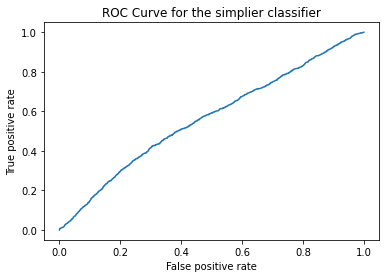

In [26]:
# ROC for the simplier classifier
fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1], pos_label="yes")
ax = sns.lineplot(fpr,tpr)
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
plt.title("ROC Curve for the simplier classifier")

auc(fpr,tpr)

/Users/oliviachoi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.9145402079795334

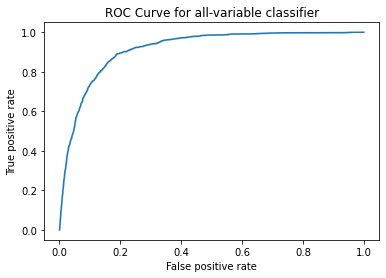

In [27]:
# ROC for all-variable classifier
fpr2, tpr2, _ = roc_curve(ytest, ytest_prob2[:,1], pos_label="yes")
ax = sns.lineplot(fpr2,tpr2)
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
plt.title("ROC Curve for all-variable classifier")

auc(fpr2,tpr2)


* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know? 

**YOUR ANSWER:** The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test. The area under the ROC curve correspons to the ability of the classifier to correctly distinguishing between a positive and a negative instance. Therefore, all-variable classifier is better. The AUROC gives the probability that a + is correctly distinguished from a -. Therefore the second model has better performance since its AUROC is 0.915 greater than 0.564 which is the AUROC of the simplier model.
* How would you explain a result where a logistic regression classifier produces an AUROC that is below 0.5 (say, 0.3)?

**YOUR ANSWER:** This means there is a mistake in the implementation of the classifier. If the target were to be reversed (predicting 0 and the AUC is a target of 1), the AUC would be below 0.5 even though the classifier is doing its job correctly. To get the 'proper' result you would simply invert the target.
